<a href="https://colab.research.google.com/github/isabellebouchard/ift6135/blob/master/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2

**Instructions**: For this part of the assignment we will train a convolutional network on MNIST
for 10 epochs using your favorite deep learning frameworks such as Pytorch of Tensor
ow. Plot the
train and valid errors at the end of each epoch for the model.
1. Come up with a CNN architecture with more or less similar number of parameters as MLP
trained in Problem 1 and describe it.
2. Compare the performances of CNN vs MLP. Comment.

You could take reference from the architecture mentioned here: 
https://github.com/MaximumEntropy/welcome_tutorials/tree/pytorch/pytorch 




### Installation Requirements

In [0]:
!pip3 install torch torchvision matplotlib 

### Use GPU 

First, select "GPU" in the Edit Menu -> Notebook Settings -> Hardware Accelerator -> GPU

**torch.cuda**: *This package adds support for CUDA tensor types, that implement the same function as CPU tensors, but they utilize GPUs for computation.*

**torch.cuda.is_available()**: *Returns a bool indicating if CUDA is currently available.*

To go from a tensor type CPU to GPU, add .to("cuda:0")

In [0]:
import torch

use_gpu = torch.cuda.is_available()
print("GPU Available: {}".format(use_gpu))
device = torch.device("cuda:0" if use_gpu else "cpu")

GPU Available: True


### MNIST Data

Get MNIST Data, split in train/validate/test and load in DataLoader

In [0]:
from torch.utils.data import sampler, DataLoader
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np
import random

batch_size = 34

# ChunkSampler class is from https://github.com/pytorch/vision/issues/168
class ChunkSampler(sampler.Sampler):
    """Samples elements sequentially from some offset. 
    Arguments:
        num_samples: # of desired datapoints
        start: offset where we should start selecting from
    """
    def __init__(self, num_samples, start = 0):
        self.num_samples = num_samples
        self.start = start

    def __iter__(self):
        return iter(range(self.start, self.start + self.num_samples))

    def __len__(self):
        return self.num_samples

train_set = MNIST(root='../data',train=True,transform=transforms.ToTensor(),download=True)
test_set = MNIST(root='../data',train=False,transform=transforms.ToTensor(),download=True)

train_set_size = len(train_set)
NUM_TRAIN = int(0.8 * train_set_size) #cast to int to avoid TypeError: 'float' object cannot be interpreted as an integer
NUM_VAL = train_set_size - NUM_TRAIN
NUM_TEST = len(test_set)

loader_train = DataLoader(train_set, batch_size=batch_size, sampler=ChunkSampler(NUM_TRAIN, 0),shuffle=False)
loader_val = DataLoader(train_set, batch_size=batch_size, sampler=ChunkSampler(NUM_VAL, NUM_TRAIN),shuffle=False)
loader_test = DataLoader(test_set, batch_size=batch_size,shuffle=False)

### CNN Model

[torch.nn.Module](https://pytorch.org/docs/master/nn.html#torch.nn.Module): Base class for all NN modules. 
Must implement __init__ (defines the layers) and **forward** (returns the output)

[torch.nn.Sequential(*args)](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential): Modules will be added to it in the order they are passed in the constructor

 [torch.nn.Conv2d](https://pytorch.org/docs/master/nn.html#torch.nn.Conv2d)(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
 
[ torch.nn.Sigmoid](https://pytorch.org/docs/master/nn.html#sigmoid)

[torch.nn.MaxPool2d](https://pytorch.org/docs/master/nn.html#torch.nn.MaxPool2d)(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False): Applies a 2D max pooling over an input signal composed of several input planes.

 [torch.nn.Linear](https://pytorch.org/docs/master/nn.html#torch.nn.Linear)(in_features, out_features, bias=True)


In [0]:
import torch.nn as nn
import copy

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    
    self.conv1 = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2))
    
    self.conv2 = nn.Sequential(
        nn.Conv2d(32,64,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2))

    self.conv3 = nn.Sequential(
        nn.Conv2d(64,96,kernel_size=5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2))
    
    self.conv4 = nn.Sequential(
        nn.Conv2d(96,246,kernel_size=3,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2))
    
    self.conv5 = nn.Sequential(
        nn.Conv2d(246,246,kernel_size=3,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2))
    
    
    self.fc = nn.Linear(2*2*246,10)

  def forward(self,x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = self.conv3(out)
    out = self.conv4(out)
    out = self.conv5(out)
    flatten = out.view(out.size(0),-1)
    fc = self.fc(flatten)
    return fc

model = CNN()
# put model on GPU
model = model.to(device)

print(model)

print("\n\n# Parameters: ", sum([param.nelement() for param in model.parameters()]))

# Save the initial weights of model
init_model_wts = copy.deepcopy(model.state_dict())

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 96, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(96, 246, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv5): Sequential(
    (0): Conv2d(246, 246, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil

### Train CNN

#### Loss function

criterion = [torch.nn.CrossEntropyLoss](https://pytorch.org/docs/master/nn.html#torch.nn.CrossEntropyLoss)(weight=None, size_average=None, ignore_index=-100, reduce=None, reduction='mean')

#### Minimize loss function using stochastic gradient descent
optimizer = [torch.optim.SGD](https://pytorch.org/docs/master/optim.html#torch.optim.SGD)(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)


In [0]:
import time

learning_rate = 1e-2
num_epochs = 24
patience = 0

#loss function
criterion = nn.CrossEntropyLoss()  

#optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

model.load_state_dict(init_model_wts)
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

train_errors = []
eval_errors = []
acc = []

print("Training begins...")
since = time.time()

for epoch in range(num_epochs):
  
  train_error = 0
  train_num = 0
  
  # model in train mode
  model.train()
  
  for digits, labels in loader_train:
    
    # digits and labels on GPU
    digits = digits.to(device)
    labels = labels.to(device)
    
    # zero gradient buffer
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(digits)
        
    # loss function
    loss = criterion(outputs,labels)
        
    # backward pass
    loss.backward()
    
    # gradient descent step
    optimizer.step()
    
    # add the loss
    train_error += loss.item()
    train_num += 1
  
  eval_error = 0
  eval_num = 0
  correct = 0
  total = 0
  
  # model in eval mode
  model.eval()
  
  for digits, labels in loader_val:
    
    # digits and labels on GPU
    digits = digits.to(device)
    labels = labels.to(device)
        
    # forward pass
    outputs = model(digits)
    _, predicted = torch.max(outputs.data, 1)

    # loss function
    loss = criterion(outputs,labels)
        
    # add the loss
    eval_error += loss.item()
    eval_num += 1
    
    # save the accuary
    total += labels.size(0)
    correct += torch.sum(predicted == labels.data)
  
  #calculate epoch accuracy
  accuracy = (100 * correct)/total
    
  # deep copy the model of best epoch accuracy
  if accuracy > best_acc:
    best_acc = accuracy
    best_model_wts = copy.deepcopy(model.state_dict())
    patience = 0
  else:
    patience += 1
  if patience == 3:
    learning_rate /= 2
  if patience > 4:
    print('early stopping')
    break
    
  # save the loss
  train_errors.append(train_error / train_num)
  eval_errors.append(eval_error / eval_num)
  
  acc.append(accuracy)
  
  #print stats after each epoch
  print('\nEpoch {}'.format(epoch + 1))
  print('\nPatience {}'.format(patience))
  print('\tTrain error: {:.4f}'.format(train_error/train_num))  
  print('\tEval error: {:.4f}'.format(eval_error/eval_num))
  print('\tAccuracy on Eval set: {:.2f}%'.format(accuracy))
  
time_elapsed = time.time() - since
print('\nTraining complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
print('Best Eval Acc: {:.2f}%'.format(best_acc))

# load best model weights
model.load_state_dict(best_model_wts)
  

Training begins...

Epoch 1

Patience 0
	Train error: 2.2885
	Eval error: 2.2232
	Accuracy on Eval set: 28.00%

Epoch 2

Patience 0
	Train error: 0.7881
	Eval error: 0.2311
	Accuracy on Eval set: 93.00%

Epoch 3

Patience 0
	Train error: 0.1796
	Eval error: 0.1407
	Accuracy on Eval set: 95.00%

Epoch 4

Patience 0
	Train error: 0.1131
	Eval error: 0.1010
	Accuracy on Eval set: 96.00%

Epoch 5

Patience 0
	Train error: 0.0860
	Eval error: 0.0870
	Accuracy on Eval set: 97.00%

Epoch 6

Patience 1
	Train error: 0.0703
	Eval error: 0.0775
	Accuracy on Eval set: 97.00%

Epoch 7

Patience 2
	Train error: 0.0595
	Eval error: 0.0703
	Accuracy on Eval set: 97.00%

Epoch 8

Patience 3
	Train error: 0.0514
	Eval error: 0.0660
	Accuracy on Eval set: 97.00%

Epoch 9

Patience 0
	Train error: 0.0450
	Eval error: 0.0629
	Accuracy on Eval set: 98.00%

Epoch 10

Patience 1
	Train error: 0.0397
	Eval error: 0.0607
	Accuracy on Eval set: 98.00%

Epoch 11

Patience 2
	Train error: 0.0352
	Eval error: 0.05

### Plot Train and Valid Errors

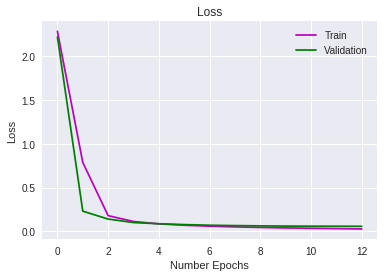

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training and validation curve
x = list(range(len(train_errors))) 
plt.plot(x, train_errors,'m',label='Train')
plt.plot(x, eval_errors,'g', label='Validation')

plt.xlabel('Number Epochs')
plt.ylabel('Loss')
plt.legend(loc='best',shadow=True, fancybox=True)
plt.title("Loss")

plt.show()

### Test CNN

In [0]:
# model in eval mode
model.eval()

correct = 0.0
total = 0.0

for digits, labels in loader_test:
  
  # digits and labels on GPU
  digits = digits.to(device)
  labels = labels.to(device)
  
  # forward pass
  outputs = model(digits)
  _, predicted = torch.max(outputs.data, 1)
  
  # save the accuary
  total += labels.size(0)
  correct += torch.sum(predicted == labels.data)
print (correct)
print (total)
print('Accuracy on the test set: {:.4f}%'.format(100.0 * correct / total))
  

tensor(9825, device='cuda:0')
10000.0
tensor(98, device='cuda:0')
Accuracy on the test set: 98%


# CNN vs. MLP 

## Number of parameters

**CNN with 4 conv layers**

conv1 = 32 filters size 5x5 + 32 biases = 32x5x5+32 = 832

conv2 = 32x64 filters size 5x5 + 64 biases = 32x64x5x5 + 64 = 51,264

conv3 = 64x96 filters size 5x5 + 96 biases = 64x96x5x5 + 128 = 153696

conv4 = 96x246 filters size 3x3 + 246 biases = 96x246x3x3 + 246 = 212790

conv5 = 246x246 filters size 3x3 + 246 biases = 246x246x3x3 + 246 = 544890

fc = 1x(2x2x246) x 10 + 10 = 9850

total CNN parameters = 832 + 51,264 + 153,696 +212790 + 544890 + 9850 = **973322**



**MLP with 2 hidden layers**

input to h1 = 784 x 512 + 512 = 401,408

h1 to h2 = 512 x 1024 + 1024 = 524,288

h2 to output = 1024 x 10  + 10 = 10,240

total MLP parameters = 401,408 + 524,288 + 10,240 = **937482**

## Discussion

CNN's need significantly less parameters than MLP since they exhibit sparse connectivity and parameter sharing. 

**Sparse connectivity**: direct connections very sparse, but in the deeper layers, units are indirectly connected to all/most of the input image. 

**Parameter sharing**: each member of the kernel is used at every position of the input, meaning the same parameters are used at all input locations. Therefore you learn only one set of parameters. 

Since we are asked to build a CNN with similar number of parameters as the MLP trained in Problem 1, the CNN should outperform the MLP since it needs a significantly smaller number of weights to be able to match an MLP's performance. 

## Performance

If m represents the size of the input image, and n the size of the output image, then MLP requires mxn parameters with O(mxn) runtime. In CNNs, you limit the number of connections of each output to k, this means you only need kxn parameters with O(kxn) runtime. 
